# Dataset Description
## Context
<br>
Speech is the most natural way of expressing ourselves as humans. It is only natural then to extend this communication medium to computer applications. We define speech emotion recognition (SER) systems as a collection of methodologies that process and classify speech signals to detect the embedded emotions. SER is not a new field, it has been around for over two decades, and has regained attention thanks to the recent advancements. These novel studies make use of the advances in all fields of computing and technology, making it necessary to have an update on the current methodologies and techniques that make SER possible. We have identified and discussed distinct areas of SER, provided a detailed survey of current literature of each, and also listed the current challenges.

## Content
Here 4 most popular datasets in English: Crema, Ravdess, Savee and Tess. Each of them contains audio in .wav format with some main labels.
<br>
Ravdess:
<br>
Here is the filename identifiers as per the official RAVDESS website:
<br>
* Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
* Vocal channel (01 = speech, 02 = song).
* Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
* Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
* Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
* Repetition (01 = 1st repetition, 02 = 2nd repetition).
* Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

So, here's an example of an audio filename. 02-01-06-01-02-01-12.wav This means the meta data for the audio file is:
<br>
* Video-only (02)
* Speech (01)
* Fearful (06)
* Normal intensity (01)
* Statement "dogs" (02)
* 1st Repetition (01)
* 12th Actor (12) - Female (as the actor ID number is even)

Crema:
<br>
The third component is responsible for the emotion label:
<br>
* SAD - sadness;
* ANG - angry;
* DIS - disgust;
* FEA - fear;
* HAP - happy;
* NEU - neutral.

Tess:

Very similar to Crema - label of emotion is contained in the name of file.

Savee:
<br>
The audio files in this dataset are named in such a way that the prefix letters describes the emotion classes as follows:
<br>
* 'a' = 'anger'
* 'd' = 'disgust'
* 'f' = 'fear'
* 'h' = 'happiness'
* 'n' = 'neutral'
* 'sa' = 'sadness'
* 'su' = 'surprise'

In [1]:
import os

In [3]:
os.listdir()

['.ipynb_checkpoints',
 'Crema',
 'Ravdess',
 'Savee',
 'Speech Emotion Recognition Dataset.zip',
 'Tess',
 'Untitled.ipynb']

In [4]:
!pip install patool
import patoolib
patoolib.extract_archive("Speech Emotion Recognition Dataset.zip", outdir="D:\My Project\Speech Emotion Recognition", interactive=True)

patool: Extracting Speech Emotion Recognition Dataset.zip ...
patool: ... Speech Emotion Recognition Dataset.zip extracted to `D:\My Project\Speech Emotion Recognition'.


'D:\\My Project\\Speech Emotion Recognition'

# Define Dataset Path

In [2]:
os.listdir()

['.git',
 '.ipynb_checkpoints',
 'Crema',
 'Ravdess',
 'Savee',
 'Speech Emotion Recognition Dataset.zip',
 'Speech Emotion Recognition.ipynb',
 'Tess']

In [77]:
crema_path = 'Crema/'
ravdess_path = 'Ravdess/'
savee_path = 'Savee/'
tess_path = 'Tess/'

Check sample filenames from each dataset

In [78]:
print("Crema audio filename sample:")
print(os.listdir(crema_path)[:5], '\n')
print("Ravdess audio filename sample:")
print(os.listdir(ravdess_path)[:5], '\n')
print("Savee audio filename sample:")
print(os.listdir(savee_path)[:5], '\n')
print("Tess audio filename sample:")
print(os.listdir(tess_path)[:5], '\n')

Crema audio filename sample:
['1001_DFA_ANG_XX.wav', '1001_DFA_DIS_XX.wav', '1001_DFA_FEA_XX.wav', '1001_DFA_HAP_XX.wav', '1001_DFA_NEU_XX.wav'] 

Ravdess audio filename sample:
['audio_speech_actors_01-24'] 

Savee audio filename sample:
['DC_a01.wav', 'DC_a02.wav', 'DC_a03.wav', 'DC_a04.wav', 'DC_a05.wav'] 

Tess audio filename sample:
['OAF_angry', 'OAF_disgust', 'OAF_Fear', 'OAF_happy', 'OAF_neutral'] 



# Create dataframe containing names of path and emotion for each audio file based on  Dataset Description

## Crema Dataset

In [79]:
os.listdir(crema_path)[1]

'1001_DFA_DIS_XX.wav'

In [80]:
os.listdir(crema_path)[1].partition('.wav')[0].split('_')

['1001', 'DFA', 'DIS', 'XX']

I will use above function to define the emotion and filepath

In [81]:
crema_list = []

for wav in os.listdir(crema_path):
    emotion = wav.partition(".wav")[0].split('_')[2]
    if emotion == 'SAD':
        crema_list.append(('sadness', crema_path+wav))
    elif emotion == 'ANG':
        crema_list.append(('angry', crema_path+wav))
    elif emotion == 'DIS':
        crema_list.append(('disgust', crema_path+wav))
    elif emotion == 'FEA':
        crema_list.append(('fear', crema_path+wav))
    elif emotion == 'HAP':
        crema_list.append(('happy', crema_path+wav))
    elif emotion == 'NEU':
        crema_list.append(('neutral', crema_path+wav))
    else:
        crema_list.append(('unknown', crema_path+wav))

print("Sample crema_list :")
print(crema_list[:5])

Sample crema_list :
[('angry', 'Crema/1001_DFA_ANG_XX.wav'), ('disgust', 'Crema/1001_DFA_DIS_XX.wav'), ('fear', 'Crema/1001_DFA_FEA_XX.wav'), ('happy', 'Crema/1001_DFA_HAP_XX.wav'), ('neutral', 'Crema/1001_DFA_NEU_XX.wav')]


In [82]:
import pandas as pd

In [83]:
df_crema = pd.DataFrame(crema_list, columns=['emotion', 'file_path'])
df_crema.head()

,emotion,file_path
0,angry,Crema/1001_DFA_ANG_XX.wav
1,disgust,Crema/1001_DFA_DIS_XX.wav
2,fear,Crema/1001_DFA_FEA_XX.wav
3,happy,Crema/1001_DFA_HAP_XX.wav
4,neutral,Crema/1001_DFA_NEU_XX.wav


In [84]:
df_crema['emotion'].unique()

array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sadness'],
      dtype=object)

## Radvess Dataset

In [85]:
os.listdir(ravdess_path)

['audio_speech_actors_01-24']

In [86]:
os.listdir(os.path.join(ravdess_path, os.listdir(ravdess_path)[0]))

['Actor_01',
 'Actor_02',
 'Actor_03',
 'Actor_04',
 'Actor_05',
 'Actor_06',
 'Actor_07',
 'Actor_08',
 'Actor_09',
 'Actor_10',
 'Actor_11',
 'Actor_12',
 'Actor_13',
 'Actor_14',
 'Actor_15',
 'Actor_16',
 'Actor_17',
 'Actor_18',
 'Actor_19',
 'Actor_20',
 'Actor_21',
 'Actor_22',
 'Actor_23',
 'Actor_24']

In [87]:
os.path.join(ravdess_path, os.listdir(ravdess_path)[0])

'Ravdess/audio_speech_actors_01-24'

In [88]:
ravdess_path = os.path.join(ravdess_path, os.listdir(ravdess_path)[0])
ravdess_path

'Ravdess/audio_speech_actors_01-24'

In [95]:
for path in os.listdir(ravdess_path):
    paths = ravdess_path+'/'+path
    print(paths)

Ravdess/audio_speech_actors_01-24/Actor_01
Ravdess/audio_speech_actors_01-24/Actor_02
Ravdess/audio_speech_actors_01-24/Actor_03
Ravdess/audio_speech_actors_01-24/Actor_04
Ravdess/audio_speech_actors_01-24/Actor_05
Ravdess/audio_speech_actors_01-24/Actor_06
Ravdess/audio_speech_actors_01-24/Actor_07
Ravdess/audio_speech_actors_01-24/Actor_08
Ravdess/audio_speech_actors_01-24/Actor_09
Ravdess/audio_speech_actors_01-24/Actor_10
Ravdess/audio_speech_actors_01-24/Actor_11
Ravdess/audio_speech_actors_01-24/Actor_12
Ravdess/audio_speech_actors_01-24/Actor_13
Ravdess/audio_speech_actors_01-24/Actor_14
Ravdess/audio_speech_actors_01-24/Actor_15
Ravdess/audio_speech_actors_01-24/Actor_16
Ravdess/audio_speech_actors_01-24/Actor_17
Ravdess/audio_speech_actors_01-24/Actor_18
Ravdess/audio_speech_actors_01-24/Actor_19
Ravdess/audio_speech_actors_01-24/Actor_20
Ravdess/audio_speech_actors_01-24/Actor_21
Ravdess/audio_speech_actors_01-24/Actor_22
Ravdess/audio_speech_actors_01-24/Actor_23
Ravdess/aud

Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).

In [97]:
ravdess_list = []
for path in os.listdir(ravdess_path):
    paths = ravdess_path+'/'+path
    for wav in os.listdir(paths):
        emotion = wav.partition(".wav")[0].split('-')[2]
        if emotion == '01':
            ravdess_list.append(('neutral', paths+'/'+wav))
        elif emotion == '02':
            ravdess_list.append(('calm', paths+'/'+wav))
        elif emotion == '03':
            ravdess_list.append(('happy', paths+'/'+wav))
        elif emotion == '04':
            ravdess_list.append(('sadness', paths+'/'+wav))
        elif emotion == '05':
            ravdess_list.append(('angry', paths+'/'+wav))
        elif emotion == '06':
            ravdess_list.append(('fear', paths+'/'+wav))
        elif emotion == '07':
            ravdess_list.append(('disgust', paths+'/'+wav))
        elif emotion == '08':
            ravdess_list.append(('surprised', paths+'/'+wav))
        else:
            ravdess_list.append(('unknown', paths+'/'+wav))

ravdess_list[:10]

[('neutral',
  'Ravdess/audio_speech_actors_01-24/Actor_01/03-01-01-01-01-01-01.wav'),
 ('neutral',
  'Ravdess/audio_speech_actors_01-24/Actor_01/03-01-01-01-01-02-01.wav'),
 ('neutral',
  'Ravdess/audio_speech_actors_01-24/Actor_01/03-01-01-01-02-01-01.wav'),
 ('neutral',
  'Ravdess/audio_speech_actors_01-24/Actor_01/03-01-01-01-02-02-01.wav'),
 ('calm',
  'Ravdess/audio_speech_actors_01-24/Actor_01/03-01-02-01-01-01-01.wav'),
 ('calm',
  'Ravdess/audio_speech_actors_01-24/Actor_01/03-01-02-01-01-02-01.wav'),
 ('calm',
  'Ravdess/audio_speech_actors_01-24/Actor_01/03-01-02-01-02-01-01.wav'),
 ('calm',
  'Ravdess/audio_speech_actors_01-24/Actor_01/03-01-02-01-02-02-01.wav'),
 ('calm',
  'Ravdess/audio_speech_actors_01-24/Actor_01/03-01-02-02-01-01-01.wav'),
 ('calm',
  'Ravdess/audio_speech_actors_01-24/Actor_01/03-01-02-02-01-02-01.wav')]

In [98]:
len(ravdess_list)

1440

In [99]:
df_ravdess = pd.DataFrame(ravdess_list, columns=['emotion', 'file_path'])
df_ravdess.head()

,emotion,file_path
0,neutral,Ravdess/audio_speech_actors_01-24/Actor_01/03-...
1,neutral,Ravdess/audio_speech_actors_01-24/Actor_01/03-...
2,neutral,Ravdess/audio_speech_actors_01-24/Actor_01/03-...
3,neutral,Ravdess/audio_speech_actors_01-24/Actor_01/03-...
4,calm,Ravdess/audio_speech_actors_01-24/Actor_01/03-...


In [114]:
df_ravdess['emotion'].unique()

array(['neutral', 'calm', 'happy', 'sadness', 'angry', 'fear', 'disgust',
       'surprised'], dtype=object)

## Savee Dataset

In [121]:
os.listdir(savee_path)[0].split('_')[1]

'a01.wav'

In [116]:
import re
re.split('(\d+)', os.listdir(savee_path)[0].split('_')[1])

['a', '01', '.wav']

* 'a' = 'anger'
* 'd' = 'disgust'
* 'f' = 'fear'
* 'h' = 'happiness'
* 'n' = 'neutral'
* 'sa' = 'sadness'
* 'su' = 'surprise'

In [137]:
savee_list = []
for wav in os.listdir(savee_path):
    emotion = re.split('(\d+)', wav.split('_')[1])[0]
    if emotion == 'a':
        savee_list.append(('angry', savee_path+wav))
    elif emotion == 'd':
        savee_list.append(('disgust', savee_path+wav))
    elif emotion == 'f':
        savee_list.append(('fear', savee_path+wav))
    elif emotion == 'h':
        savee_list.append(('happy', savee_path+wav))
    elif emotion == 'n':
        savee_list.append(('neutral', savee_path+wav))
    elif emotion == 'sa':
        savee_list.append(('sadness', savee_path+wav))
    elif emotion == 'su':
        savee_list.append(('surprised', savee_path+wav))
    else:
        savee_list.append(('unknown', savee_path+wav))

savee_list[:10]

[('angry', 'Savee/DC_a01.wav'),
 ('angry', 'Savee/DC_a02.wav'),
 ('angry', 'Savee/DC_a03.wav'),
 ('angry', 'Savee/DC_a04.wav'),
 ('angry', 'Savee/DC_a05.wav'),
 ('angry', 'Savee/DC_a06.wav'),
 ('angry', 'Savee/DC_a07.wav'),
 ('angry', 'Savee/DC_a08.wav'),
 ('angry', 'Savee/DC_a09.wav'),
 ('angry', 'Savee/DC_a10.wav')]

In [138]:
len(savee_list)

480

In [139]:
df_savee = pd.DataFrame(savee_list, columns=['emotion', 'file_path'])
df_savee.head()

,emotion,file_path
0,angry,Savee/DC_a01.wav
1,angry,Savee/DC_a02.wav
2,angry,Savee/DC_a03.wav
3,angry,Savee/DC_a04.wav
4,angry,Savee/DC_a05.wav


In [140]:
df_savee['emotion'].unique()

array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sadness',
       'surprised'], dtype=object)

## Tess Dataset

In [141]:
os.listdir(tess_path)

['OAF_angry',
 'OAF_disgust',
 'OAF_Fear',
 'OAF_happy',
 'OAF_neutral',
 'OAF_Pleasant_surprise',
 'OAF_Sad',
 'YAF_angry',
 'YAF_disgust',
 'YAF_fear',
 'YAF_happy',
 'YAF_neutral',
 'YAF_pleasant_surprised',
 'YAF_sad']

In [152]:
tess_list = []
for path in os.listdir(tess_path):
    paths = tess_path+path
    for wav in os.listdir(paths):
        emotion = wav.partition(".wav")[0].split('_')[2]
        if emotion == 'angry':
            tess_list.append(('angry', paths+'/'+wav))
        elif emotion == 'disgust':
            tess_list.append(('disgust', paths+'/'+wav))
        elif emotion == 'fear':
            tess_list.append(('fear', paths+'/'+wav))
        elif emotion == 'happy':
            tess_list.append(('happy', paths+'/'+wav))
        elif emotion == 'neutral':
            tess_list.append(('neutral', paths+'/'+wav))
        elif emotion == 'ps':
            tess_list.append(('surprised', paths+'/'+wav))
        elif emotion == 'sad':
            tess_list.append(('sadness', paths+'/'+wav))
        else:
            tess_list.append(('unknown', paths+'/'+wav))

tess_list[:10]

[('angry', 'Tess/OAF_angry/OAF_back_angry.wav'),
 ('angry', 'Tess/OAF_angry/OAF_bar_angry.wav'),
 ('angry', 'Tess/OAF_angry/OAF_base_angry.wav'),
 ('angry', 'Tess/OAF_angry/OAF_bath_angry.wav'),
 ('angry', 'Tess/OAF_angry/OAF_bean_angry.wav'),
 ('angry', 'Tess/OAF_angry/OAF_beg_angry.wav'),
 ('angry', 'Tess/OAF_angry/OAF_bite_angry.wav'),
 ('angry', 'Tess/OAF_angry/OAF_boat_angry.wav'),
 ('angry', 'Tess/OAF_angry/OAF_bone_angry.wav'),
 ('angry', 'Tess/OAF_angry/OAF_book_angry.wav')]

In [153]:
df_tess = pd.DataFrame(tess_list, columns=['emotion', 'file_path'])
df_tess.head()

,emotion,file_path
0,angry,Tess/OAF_angry/OAF_back_angry.wav
1,angry,Tess/OAF_angry/OAF_bar_angry.wav
2,angry,Tess/OAF_angry/OAF_base_angry.wav
3,angry,Tess/OAF_angry/OAF_bath_angry.wav
4,angry,Tess/OAF_angry/OAF_bean_angry.wav


In [154]:
df_tess['emotion'].unique()

array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'surprised',
       'sadness'], dtype=object)

## Merge Dataframes

In [155]:
df = pd.concat([df_crema, df_ravdess, df_savee, df_tess], ignore_index=True)
df.head()

,emotion,file_path
0,angry,Crema/1001_DFA_ANG_XX.wav
1,disgust,Crema/1001_DFA_DIS_XX.wav
2,fear,Crema/1001_DFA_FEA_XX.wav
3,happy,Crema/1001_DFA_HAP_XX.wav
4,neutral,Crema/1001_DFA_NEU_XX.wav


# Exploratory Data Analysis

In [162]:
df['emotion'].value_counts()

pandas.core.series.Series

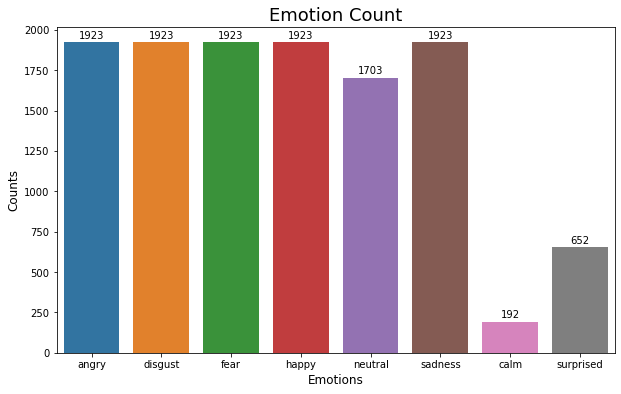

In [189]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.title("Emotion Count", size=18)
cplot = sns.countplot(x='emotion', data=df)
plt.xlabel("Emotions", size=12)
plt.ylabel("Counts", size=12)
for p in cplot.patches:
    cplot.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 7), textcoords = 'offset points')